In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = pd.read_csv('../../../data/train/angular_ts.csv')
data.head(5)

In [ ]:
data_test = pd.read_csv('../../../data/test/components_ts.csv')
data_test.head(5)

In [7]:
################## making dataset_vec ##################

import csv
import pandas as pd

def parse_file_name(name):
    # file name pattern: name_commitId_before/after.ts

    index = name.rfind('_')
    file_type = name[index+1:-3]

    name = name[:index]
    index = name.rfind('_')
    commit_id = name[index+1:]

    name = name[17:index]

    index = name.find(':')
    if index != -1:
        name = name.replace(':', '/')

    return name, commit_id, file_type


def vec_to_float(list):
    list_float = [float(l) for l in list]
    return list_float


def get_file_vectors(tokens_file, vectors_file):
    with open(tokens_file, 'r') as tokens, \
            open(vectors_file, 'r') as vectors:
        tokens = tokens.read().splitlines()
        vectors_list = vectors.read().splitlines()

        names = []
        for i in range(0, len(tokens)):
            if i % 2 == 0:
                if tokens[i].startswith('raw_data/val_dir'):
                    names.append(tokens[i])


    filenames = []
    commits = []
    types = []

    for name in names:
        filename, commit_id, file_type = parse_file_name(name)
        filenames.append(filename)
        commits.append(commit_id)
        types.append(file_type)

    file_vectors = []

    for i in range(0, len(names)):
        vector_list = vectors_list[i].split()
        vector_list = vec_to_float(vector_list)

        same_file = [file for file in file_vectors
                   if (file.get('name') == filenames[i] and file.get('commit_id') == commits[i])]

        if same_file:
            if types[i] == 'before':
                same_file[0]['vector_before'] = vector_list
            elif types[i] == 'after':
                same_file[0]['vector_after'] = vector_list
        else:
            if types[i] == 'before':
                file_vec = {'name': filenames[i], 'commit_id': commits[i], 'vector_before': vector_list}
            elif types[i] == 'after':
                file_vec = {'name': filenames[i], 'commit_id': commits[i], 'vector_after': vector_list}
            file_vectors.append(file_vec)

    return file_vectors


file_vectors = get_file_vectors('../../../data/train/vectors_data/val_raw.txt', '../../../data/train/vectors_data/ts_dataset.val.c2v.vectors')
file_test_vectors = get_file_vectors('../../../data/test/vectors_data/components_vectors/val_raw.txt',
                                     '../../../data/test/vectors_data/components_vectors/ts_dataset.val.c2v.vectors')

data_vectors = pd.DataFrame(file_vectors)
data_test_vectors = pd.DataFrame(file_test_vectors)

data_vectors = data_vectors.fillna(0)
data_test_vectors = data_test_vectors.fillna(0)

data_vectors = data_vectors.rename(columns={'name': 'file_name'})
data_test_vectors = dadata_test_vectors.rename(columns={'name': 'file_name'})

merged = pd.merge(left=data, right=data_vectors, on=['file_name', 'commit_id'], how='inner')
merged_test = pd.merge(left=data_test, right=data_test_vectors, on=['file_name', 'commit_id'], how='inner')

,file_name,file_type,file_diff_type,is_added,is_deleted,is_modified,is_renamed,file_diff,file_before,file_after,commit_id,commit_type,vector_after,vector_before
0,aio/content/examples/built-in-directives/src/a...,1,2,0,0,1,0,+ !(this.nullCustomer = null) ? (this.nul...,"import { Component, OnInit } from '@angular/co...","import { Component, OnInit } from '@angular/co...",9c5fc1693a07e7411e68b3c0583a05d54f22c78b,3,"[0.23563519, -0.15625627, 0.03737405, 0.410486...","[0.23563519, -0.15625627, 0.03737405, 0.410486..."
1,aio/content/examples/architecture/e2e/src/app....,1,2,0,0,1,0,- const h2 = element.all(by.css('h2')).ma...,"import { protractor, browser, element, by, Ele...","import { protractor, browser, element, by, Ele...",01db37435ff733dea571370688e62373a053ba74,3,"[0.30808026, -0.15802056, 0.063062616, 0.32377...","[0.30808026, -0.15802056, 0.063062616, 0.32377..."
2,aio/content/examples/architecture/src/app/back...,1,2,0,0,1,0,- const err = new Error('Cannot get objec...,"import { Injectable, Type } from '@angular/cor...","import { Injectable, Type } from '@angular/cor...",01db37435ff733dea571370688e62373a053ba74,3,"[0.12170838, -0.2235764, 0.13226472, 0.1849094...","[0.12170838, -0.2235764, 0.13226472, 0.1849094..."
3,aio/content/examples/architecture/src/app/sale...,1,2,0,0,1,0,- const amount = (typeof value === 'strin...,import { Injectable } from '@angular/core';\n\...,import { Injectable } from '@angular/core';\n\...,01db37435ff733dea571370688e62373a053ba74,3,"[-0.41465417, -0.24975275, -0.1860255, 0.20304...","[-0.41465417, -0.24975275, -0.1860255, 0.20304..."
4,aio/content/examples/binding-syntax/src/app/ap...,1,2,0,0,1,0,- const testButton = document.getElementB...,"import { Component, ViewChild, ElementRef } fr...","import { Component, ViewChild, ElementRef } fr...",01db37435ff733dea571370688e62373a053ba74,3,"[-0.1849036, -0.026450332, -0.27863508, 0.0789...","[-0.1849036, -0.026450332, -0.27863508, 0.0789..."


In [8]:
table = merged[['is_added', 'is_deleted', 'is_modified', 'is_renamed', 'file_before', 'file_after', 'commit_type']]
table_test = merged_test[['is_added', 'is_deleted', 'is_modified', 'is_renamed', 'file_before', 'file_after', 'commit_type']]

,is_added,is_deleted,is_modified,is_renamed,file_before,file_after,commit_type
0,0,0,1,0,"import { Component, OnInit } from '@angular/co...","import { Component, OnInit } from '@angular/co...",3
1,0,0,1,0,"import { protractor, browser, element, by, Ele...","import { protractor, browser, element, by, Ele...",3
2,0,0,1,0,"import { Injectable, Type } from '@angular/cor...","import { Injectable, Type } from '@angular/cor...",3
3,0,0,1,0,import { Injectable } from '@angular/core';\n\...,import { Injectable } from '@angular/core';\n\...,3
4,0,0,1,0,"import { Component, ViewChild, ElementRef } fr...","import { Component, ViewChild, ElementRef } fr...",3
...,...,...,...,...,...,...,...
590,0,0,1,0,import { Injectable } from '@angular/core';\n\...,import { Injectable } from '@angular/core';\n\...,3
591,0,0,1,0,/*\n * A collection of demo components showing...,/*\n * A collection of demo components showing...,3
592,0,0,1,0,"import { protractor, browser, element, by, Ele...","import { protractor, browser, element, by, Ele...",3
593,0,0,1,0,import { Component } from '@angular/core';\n\n...,import { Component } from '@angular/core';\n\n...,3


In [2]:
data_test = table_test[['file_type', 'file_diff_type', 'file_diff']]
y_data_test = table_test[['commit_type']]

X_train, X_test, y_train, y_test = train_test_split(
    table[['file_type', 'file_diff_type', 'file_diff']],
    table[['commit_type']], test_size=0.2)

(44666, 6)

In [4]:
n_neighbors_values = range(1, 50, 5)
scores_data = pd.DataFrame()

In [2]:
################## looking for the best n_neighbors ##################

In [5]:
for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)

    score_data = pd.DataFrame({'max_depth': [n],
                               'train_score': [train_score],
                               'test_score': [test_score]})
    scores_data = scores_data.append(score_data)
    print(n)

/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


11


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


16


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


21


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


26


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


31


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


36


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


41


/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


46


In [9]:
scores_data = scores_data.rename(columns={'max_depth': 'n_neighbors'})
scores_data

,n_neighbors,train_score,test_score
0,1,0.955754,0.637229
0,6,0.715493,0.591225
0,11,0.663859,0.578017
0,16,0.635509,0.569286
0,21,0.615974,0.563353
0,26,0.601030,0.551936
0,31,0.590563,0.544773
0,36,0.575842,0.536714
0,41,0.563696,0.535706
0,46,0.553649,0.528431


In [16]:
scores_data_long = pd.melt(scores_data, id_vars=['n_neighbors'],
                           value_vars=['train_score', 'test_score'],
                           var_name='type',
                           value_name='score')
scores_data_long

,n_neighbors,type,score
0,1,train_score,0.955754
1,6,train_score,0.715493
2,11,train_score,0.663859
3,16,train_score,0.635509
4,21,train_score,0.615974
5,26,train_score,0.601030
6,31,train_score,0.590563
7,36,train_score,0.575842
8,41,train_score,0.563696
9,46,train_score,0.553649


[(0.0, 50.0)]

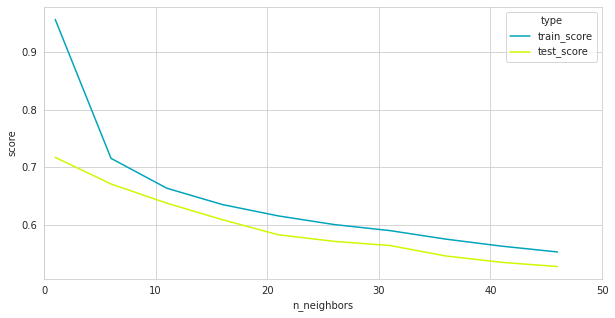

In [17]:
sns.set_style("whitegrid")

fig,ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(data=scores_data_long,
                    x='n_neighbors',
                    y='score',
                    hue='type',
                    ax=ax,
                    palette='nipy_spectral')
ax.set(xlim=(0, 50))


In [18]:
plot.figure.savefig('../../../data/angular/images/knn/train_test_score_k_neighbors_1.png')

In [ ]:
################## best estimator ##################

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

/home/ekaterina/Documents/ucheb/diplom/itmo-source-code-changes-analyser/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(),
                                                  'file_diff')])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)

In [ ]:
predicted = knn.predict(data_test)
pred_score = knn.score(data_test, y_data_test)